<a href="https://colab.research.google.com/github/Sachingowda8431/Sachingowda8431/blob/main/assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("/content/Boston_Housing[1].csv")

In [ ]:
X=df.drop(columns=["RM"])
y=df["TAX"]

In [ ]:
scaler=StandardScaler()

In [ ]:
data_scaled=scaler.fit_transform(df)

In [ ]:
kmeans=KMeans(n_clusters=2,init="k-means++")
kmeans.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
kmeans.inertia_

4585.744157046634

In [ ]:
SSE=[]
for cluster in range(1,20):
  kmeans=KMeans(n_clusters=cluster,init="k-means++")
  kmeans.fit(data_scaled)
  SSE.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'interia')

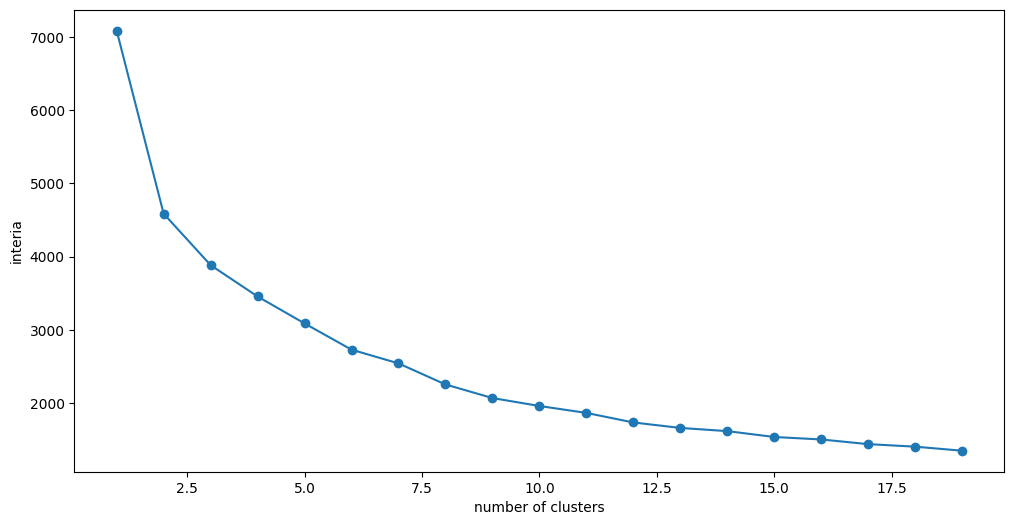

In [ ]:
frame=pd.DataFrame({"cluster":range(1,20), "SSE":SSE})
plt.figure(figsize=(12,6))
plt.plot(frame["cluster"],frame["SSE"],marker="o")
plt.xlabel("number of clusters")
plt.ylabel("interia")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 1167374.6951132384


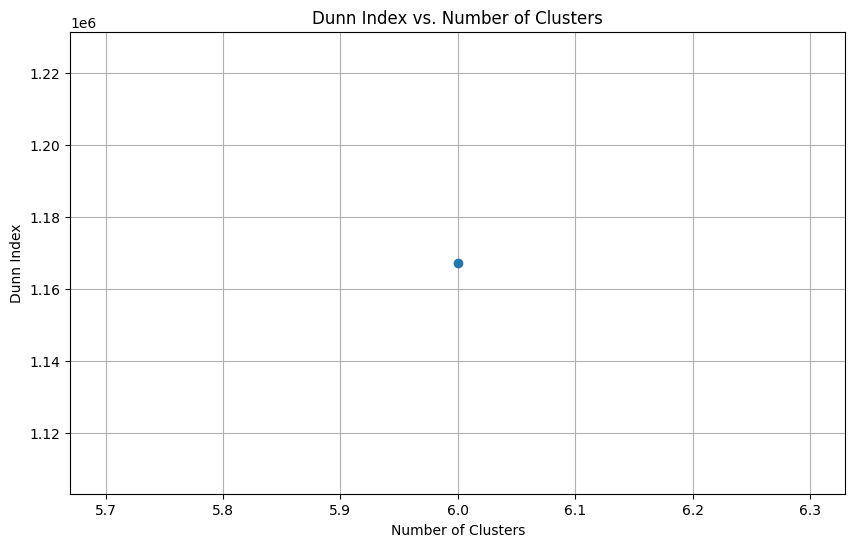

In [28]:
n_clusters = 6

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(X)

inertia = kmeans.inertia_
print("Inertia:", inertia)
plt.figure(figsize=(10, 6))
plt.plot(n_clusters,inertia, marker='o', linestyle='-')
plt.title("Dunn Index vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Dunn Index")
plt.grid(True)
plt.show()

Dunn Index: 3.2527899746977234


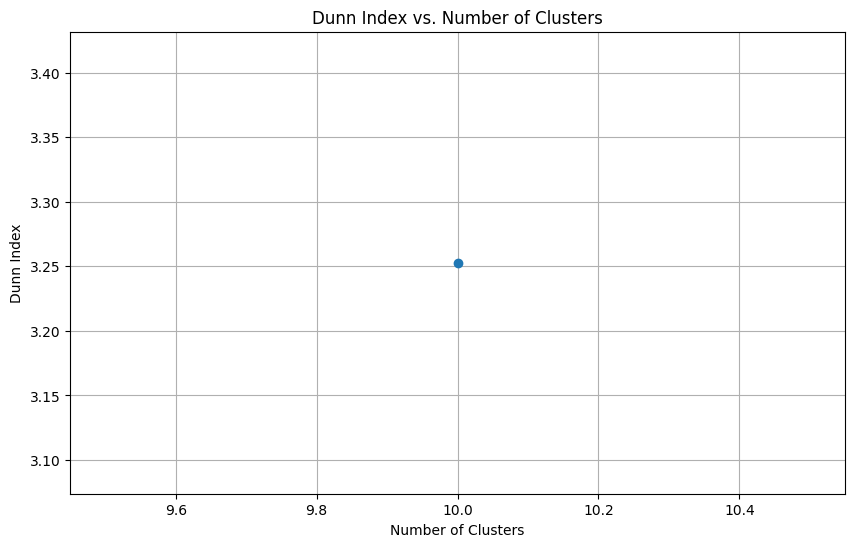

In [25]:
from sklearn.metrics import pairwise_distances
import itertools

cluster_centers = kmeans.cluster_centers_
inter_cluster_distances = pairwise_distances(cluster_centers, metric='euclidean')

intra_cluster_distances = []
labels = kmeans.labels_
for i in range(n_clusters):
    cluster_points = X[labels == i]
    if len(cluster_points) > 1:
      distances = pairwise_distances(cluster_points, metric='euclidean')
      max_intra_distance = np.max(distances)
      intra_cluster_distances.append(max_intra_distance)
      cluster_range = range(2, 11)
dunn_indices = []

dunn_index = np.max(inter_cluster_distances) / np.max(intra_cluster_distances)
print("Dunn Index:", dunn_index)
plt.figure(figsize=(10, 6))
plt.plot(n_clusters,dunn_index, marker='o', linestyle='-')
plt.title("Dunn Index vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Dunn Index")
plt.grid(True)
plt.show()

In [29]:
#PCA
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv("/content/Boston_Housing[1].csv")

In [36]:
X=df.drop(columns=["RM"])
y=df["TAX"]

In [37]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_standardized = (X - mean) / std

In [42]:
n_components = 5
pca = PCA(n_components=n_components)

In [43]:
X_reduced = pca.fit_transform(X_standardized)

In [44]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

Explained Variance Ratios: [0.48543327 0.11628899 0.08840184 0.06545675 0.06040393]


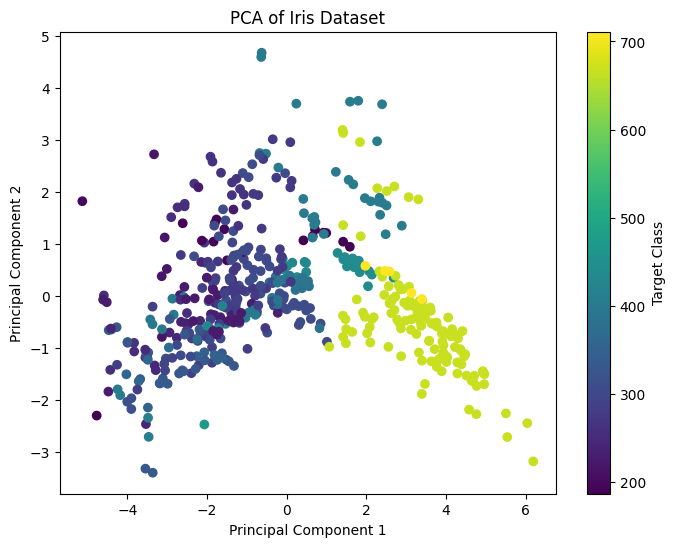

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Target Class')
plt.show()